Let's understand A/B testing using a simulated example. We will test for two means.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [60]:
# let's start with two normal distributions with different means
controlPopulation = np.random.normal(loc=10, scale=3, size=1_000_000)
treatmentPopulation = np.random.normal(loc=12, scale=3, size=1_000_000)

So, we are assuming here that our treatment had effect, thus an increase in 20% in the mean, while maintaining the variance fixed.

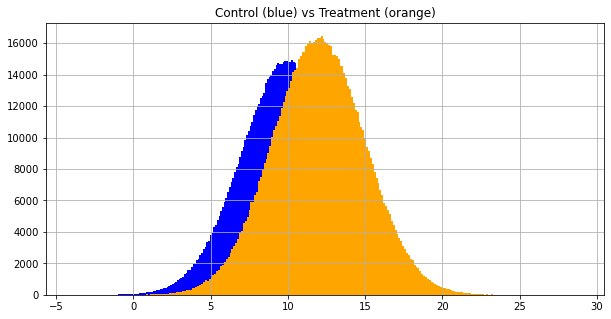

In [61]:
# plotting the distributions
plt.figure(figsize=(10,5))
plt.grid()
plt.hist(controlPopulation, color="blue", bins=250)
plt.hist(treatmentPopulation, color="orange", bins=250)
plt.title("Control (blue) vs Treatment (orange)")
plt.show()

When we perform a test, we always look at a sample. Since we don't look at the whole population, we always have a probability of making a mistake depending on the sample we take.

In [62]:
controlSample = np.random.choice(controlPopulation, 1000)
treatmentSample = np.random.choice(treatmentPopulation, 1000)

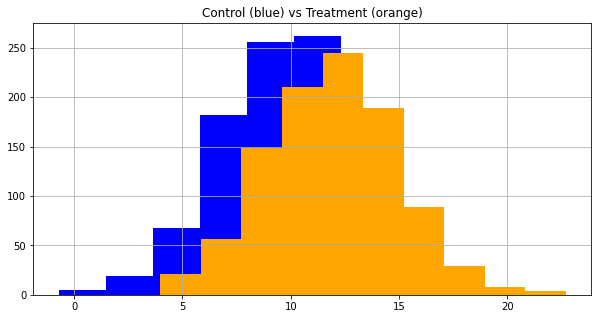

In [63]:
# let's see the samples
plt.figure(figsize=(10,5))
plt.grid()
plt.hist(controlSample, color="blue")
plt.hist(treatmentSample, color="orange")
plt.title("Control (blue) vs Treatment (orange)")
plt.show()

Even though we took a small sample from our population, we stil can see the general shape of the curves. We can also see that the Treatment curve is to the right of the Control curve, which indicates a larger mean.<br>
By performing a two sample t-test, we will test whether the difference is **significant**, meaning, if it is unprobable enough for we to reject the hypothesis that the means are the same. Let's do it!

In [64]:
ttest_ind(a=controlSample, b=treatmentSample, equal_var=True, alternative="two-sided")

Ttest_indResult(statistic=-15.521194593066168, pvalue=2.201279586215649e-51)

Wooooooooow, the p-value is really small!!<br>
This means that, only looking at theses samples, we can assure that there is a 2/100000000000000000000000000000000000000000000000000 chance that we see this result (or a result even more extreme) considering that the null hypothesis (same means) is True.

For that reason, we reject the null hypothesis.

# Part 2 - What ifs

**What if we decrease the difference between the means??**<br>
What will happen? I believe that the p-value will increase, given that the effect is smaller

In [65]:
# let's start with two normal distributions with different means
controlPopulation = np.random.normal(loc=10, scale=3, size=1_000_000)
treatmentPopulation = np.random.normal(loc=10.5, scale=3, size=1_000_000)

In [66]:
controlSample = np.random.choice(controlPopulation, 1000)
treatmentSample = np.random.choice(treatmentPopulation, 1000)

In [67]:
ttest_ind(a=controlSample, b=treatmentSample, equal_var=True, alternative="two-sided")

Ttest_indResult(statistic=-5.903432846677651, pvalue=4.1727423674410405e-09)

Hmmmmmmmmmmmmmmm, look at the p-value! It is much larger!<br>
This means that the test is less confident that the difference is significant. Under the null hypothesis, there is a probability of 2.1% of seeing such result (or even more extreme).

**What if we decrease the difference between the means and increase sample size??**<br>
What will happen? I believe that the p-value will decrease because we have more samples

In [68]:
# let's start with two normal distributions with different means
controlPopulation = np.random.normal(loc=10, scale=3, size=1_000_000)
treatmentPopulation = np.random.normal(loc=10.5, scale=3, size=1_000_000)

In [69]:
controlSample = np.random.choice(controlPopulation, 2000)
treatmentSample = np.random.choice(treatmentPopulation, 2000)

In [70]:
ttest_ind(a=controlSample, b=treatmentSample, equal_var=True, alternative="two-sided")

Ttest_indResult(statistic=-3.788495162059661, pvalue=0.00015379203727006738)

**What if we increase the variance??**<br>
What will happen? I believe that the p-value will increase

In [71]:
# let's start with two normal distributions with different means
controlPopulation = np.random.normal(loc=10, scale=5, size=1_000_000)
treatmentPopulation = np.random.normal(loc=12, scale=5, size=1_000_000)

In [72]:
controlSample = np.random.choice(controlPopulation, 2000)
treatmentSample = np.random.choice(treatmentPopulation, 2000)

In [73]:
ttest_ind(a=controlSample, b=treatmentSample, equal_var=True, alternative="two-sided")

Ttest_indResult(statistic=-13.203702331148873, pvalue=5.410420354936178e-39)

**What if we increase A LOT the variance??**<br>
What will happen? I believe that the p-value will increase

In [74]:
# let's start with two normal distributions with different means
controlPopulation = np.random.normal(loc=10, scale=50, size=1_000_000)
treatmentPopulation = np.random.normal(loc=12, scale=50, size=1_000_000)

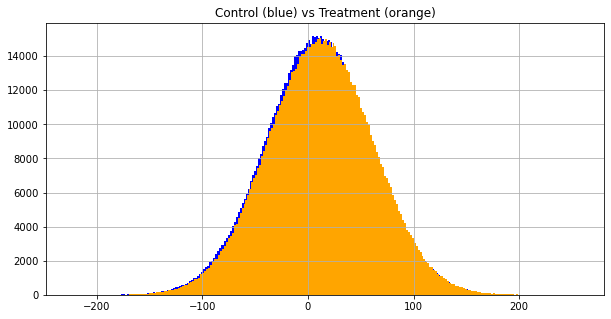

In [75]:
# plotting the distributions
plt.figure(figsize=(10,5))
plt.grid()
plt.hist(controlPopulation, color="blue", bins=250)
plt.hist(treatmentPopulation, color="orange", bins=250)
plt.title("Control (blue) vs Treatment (orange)")
plt.show()

In [76]:
controlSample = np.random.choice(controlPopulation, 2000)
treatmentSample = np.random.choice(treatmentPopulation, 2000)

In [77]:
ttest_ind(a=controlSample, b=treatmentSample, equal_var=True, alternative="two-sided")

Ttest_indResult(statistic=-2.4918115142549198, pvalue=0.01274956241981269)

**What if the distributions are not normal?**

In [87]:
# let's start with two normal distributions with different means
controlPopulation = np.random.exponential(scale=10, size=1_000_000)
treatmentPopulation = np.random.exponential(scale=12, size=1_000_000)

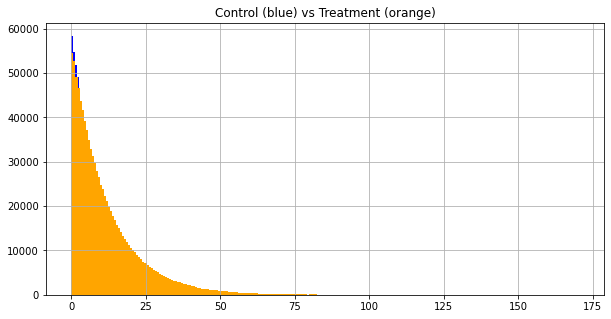

In [88]:
# plotting the distributions
plt.figure(figsize=(10,5))
plt.grid()
plt.hist(controlPopulation, color="blue", bins=250)
plt.hist(treatmentPopulation, color="orange", bins=250)
plt.title("Control (blue) vs Treatment (orange)")
plt.show()

In [ ]:
controlSample = np.random.choice(controlPopulation, 1000)
treatmentSample = np.random.choice(treatmentPopulation, 1000)

In [89]:
ttest_ind(a=controlSample, b=treatmentSample, equal_var=True, alternative="two-sided")

Ttest_indResult(statistic=-2.4918115142549198, pvalue=0.01274956241981269)

It seems that the t test responds well to non-normal distributions.

In [98]:
p_values = []
for _ in range(1000):
    controlSample = np.random.choice(controlPopulation, 1000)
    treatmentSample = np.random.choice(treatmentPopulation, 1000)
    p = ttest_ind(a=controlSample, b=treatmentSample, equal_var=True, alternative="two-sided")[1]
    p_values.append(p)

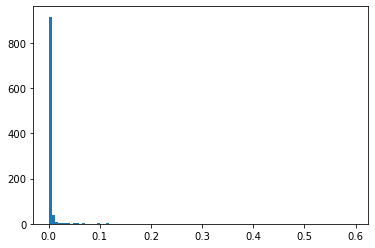

In [99]:
plt.hist(p_values, bins=100)
plt.show()

The p-values are concentrated in 0, showing that the distributions are indeed significantly different.

**What if the distributions are the same?**<br>aka A/A test

In [100]:
# let's start with two normal distributions with different means
controlPopulation = np.random.normal(loc=10, scale=3, size=1_000_000)

In [101]:
controlSample = np.random.choice(controlPopulation, 1000)
treatmentSample = np.random.choice(controlPopulation, 1000)

In [102]:
ttest_ind(a=controlSample, b=treatmentSample, equal_var=True, alternative="two-sided")

Ttest_indResult(statistic=0.9392926639457723, pvalue=0.34769403991992576)

The test is able to detect that the difference between the samples are not significant. Interesting!

According to the theory, the p-values of A/A tests should be uniformally distributed. Let's test this.

In [103]:
p_values = []
for _ in range(1000):
    controlSample = np.random.choice(controlPopulation, 1000)
    treatmentSample = np.random.choice(controlPopulation, 1000)
    p = ttest_ind(a=controlSample, b=treatmentSample, equal_var=True, alternative="two-sided")[1]
    p_values.append(p)

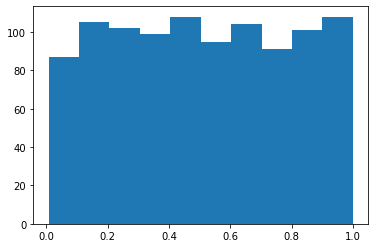

In [105]:
plt.hist(p_values, bins=10)
plt.show()

It works!